In [156]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [157]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [158]:
X_train.shape

(35000, 32, 32, 3)

In [159]:
# Normalizing the values between -1 and 1

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [160]:
X_train=X_train.reshape(len(X_train),32,32,3)
X_test=X_test.reshape(len(X_test),32,32,3)

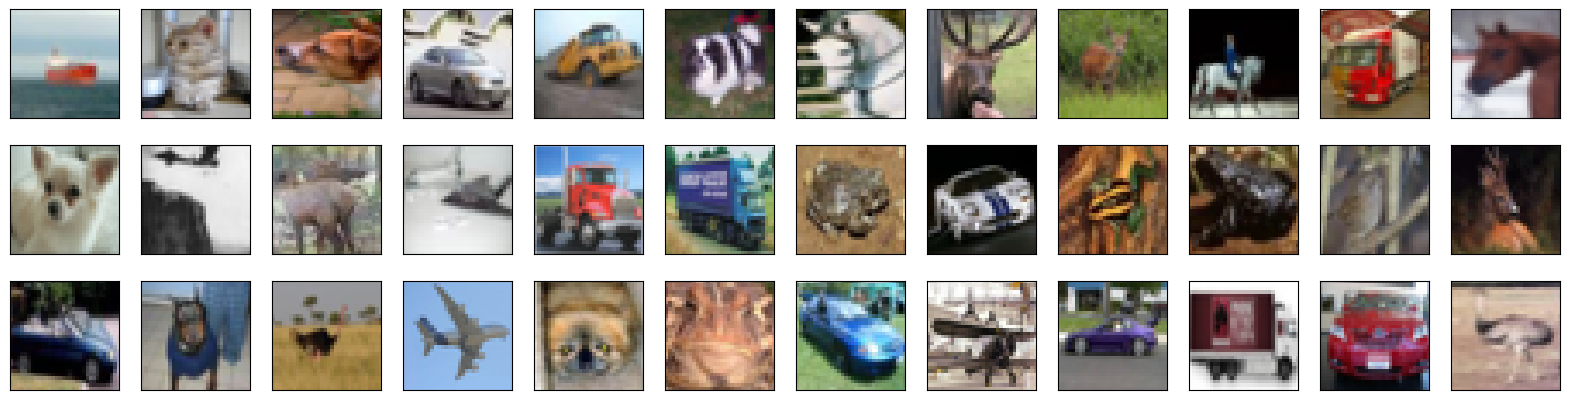

In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [162]:
X_train[0]

array([[[0.81960785, 0.8666667 , 0.87058824],
        [0.8156863 , 0.8666667 , 0.8666667 ],
        [0.8235294 , 0.87058824, 0.8745098 ],
        ...,
        [0.9137255 , 0.9490196 , 0.92156863],
        [0.91764706, 0.9529412 , 0.9254902 ],
        [0.92156863, 0.95686275, 0.93333334]],

       [[0.8039216 , 0.85882354, 0.8627451 ],
        [0.8       , 0.85490197, 0.85882354],
        [0.8117647 , 0.8666667 , 0.87058824],
        ...,
        [0.90588236, 0.9411765 , 0.9254902 ],
        [0.9098039 , 0.94509804, 0.9254902 ],
        [0.9137255 , 0.9490196 , 0.93333334]],

       [[0.76862746, 0.83137256, 0.84313726],
        [0.76862746, 0.827451  , 0.8392157 ],
        [0.7764706 , 0.8352941 , 0.84705883],
        ...,
        [0.8509804 , 0.8901961 , 0.8862745 ],
        [0.8509804 , 0.89411765, 0.8901961 ],
        [0.85882354, 0.8980392 , 0.89411765]],

       ...,

       [[0.34901962, 0.43137255, 0.4509804 ],
        [0.3529412 , 0.43529412, 0.45490196],
        [0.34509805, 0

In [163]:
Y_train[0]

array([8], dtype=uint8)

In [164]:
#!pip install keras-tuner

In [165]:
# def build_model(hp):
#   model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,6]),
#         activation='relu',
#         input_shape=(32,32,3)
#     ),
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,6]),
#         activation='relu'
#     ),
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(10, activation='softmax')
#   ])

#   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

#   return model

In [166]:
# from kerastuner import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters

In [167]:
# tuner_search=RandomSearch(build_model,
#                           objective='val_accuracy',
#                           max_trials=5,directory='output',project_name="CIFAR_10")

In [168]:
# tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)

In [169]:
# model=tuner_search.get_best_models(num_models=1)[0]

In [170]:
# model.summary()

In [171]:
from keras.utils import np_utils

# break training set into training and validation sets
(X_train,X_valid) = X_train[5000:], X_train[:5000]
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(Y_train))
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
Y_valid = keras.utils.to_categorical(Y_valid, num_classes)

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (30000, 32, 32, 3)
30000 train samples
15000 test samples
5000 validation samples


In [172]:
from keras.preprocessing.image import ImageDataGenerator

In [193]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')
datagen.fit(X_train)

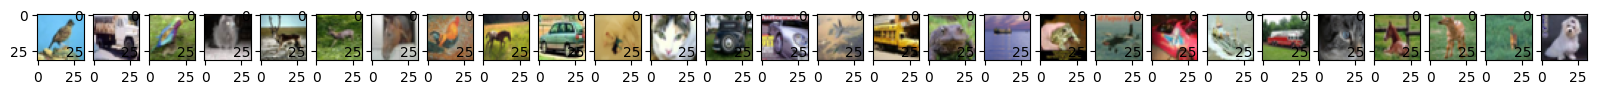

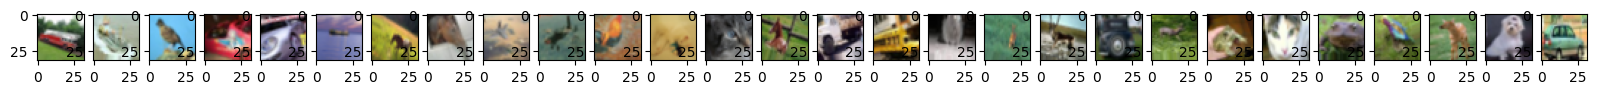

In [174]:
number_of_images_to_view = 28
X_train_subset = X_train[:number_of_images_to_view]
figure = plt.figure(figsize=(20,2))
for i in range(0, len(X_train_subset)):
    images = figure.add_subplot(1, number_of_images_to_view, i+1)
    images.imshow(X_train_subset[i])

plt.show()

figure_1 = plt.figure(figsize=(20,2))
for x_batch in datagen.flow(X_train_subset, batch_size=28):
    for i in range(0, number_of_images_to_view):
        images_1 = figure_1.add_subplot(1, number_of_images_to_view, i+1)
        images_1.imshow(x_batch[i])
    plt.show()
    break;

In [175]:
x_batch[0]

array([[[0.802818  , 0.81942046, 0.8187333 ],
        [0.7433949 , 0.76779056, 0.76125854],
        [0.68519634, 0.7171811 , 0.7052123 ],
        ...,
        [0.71322584, 0.772125  , 0.679355  ],
        [0.8336387 , 0.85779375, 0.8237891 ],
        [0.95667356, 0.9587224 , 0.952752  ]],

       [[0.93765265, 0.9355924 , 0.9514775 ],
        [0.93375605, 0.93266994, 0.9466068 ],
        [0.92985946, 0.9297475 , 0.94173604],
        ...,
        [0.7387329 , 0.7872227 , 0.7118488 ],
        [0.8763686 , 0.8905849 , 0.872447  ],
        [0.9943222 , 0.9906667 , 0.9904006 ]],

       [[0.84730893, 0.86612904, 0.86072105],
        [0.8891973 , 0.8982759 , 0.9035836 ],
        [0.9310857 , 0.9304228 , 0.9464461 ],
        ...,
        [0.78322667, 0.8203078 , 0.76432866],
        [0.9140172 , 0.92252916, 0.91009563],
        [0.9971661 , 0.99433213, 0.99433213]],

       ...,

       [[0.44464642, 0.56766254, 0.2784931 ],
        [0.45324257, 0.58408684, 0.2885367 ],
        [0.45215732, 0

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [176]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [177]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [178]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: first of all we should think what the need of doing batch normalization nitially, our inputs are in normalized form as they are
coming from the pre-processing stage. When the input passes through the first layer, it transforms, as a sigmoid function applied over
the dot product of input X and the weight matrix W Similarly, this transformation will take place for the second layer and go till the last layer L
Although, our input X was normalized with time the output will no longer be on the same scale. As the data go through multiple layers of
the neural network and L activation functions are applied, it leads to an internal co-variate shift in the data.
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This
has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to
a layer per mini-batch and using these statistics to perform the standardization.

sources_1 :   https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f#:~:text=We%20can%20add%20batch%20normalization,way%20as%20adding%
20Dense%20layer.&text=%3D'softmax')-,%5D)%3B,Momentum%20defaults%20to%200.99

sources_2 :   https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/#:~:text=Now%20coming%2
0back%20to%20Batch,coming%20from%20a%20previous%20layer.
"""

"\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: first of all we should think what the need of doing batch normalization nitially, our inputs are in normalized form as they are \ncoming from the pre-processing stage. When the input passes through the first layer, it transforms, as a sigmoid function applied over \nthe dot product of input X and the weight matrix W Similarly, this transformation will take place for the second layer and go till the last layer L\nAlthough, our input X was normalized with time the output will no longer be on the same scale. As the data go through multiple layers of \nthe neural network and L activation functions are applied, it leads to an internal co-variate shift in the data.\nBatch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This \nhas the effect of 

In [179]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [194]:
model = tf.keras.Sequential()

# Intermediate layers
#model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(18, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(20,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(28, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(40, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [181]:
#!pip install keras-tuner

In [182]:
# def build_model(hp):
#   model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,6]),
#         activation='relu',
#         input_shape=(32,32,3)
#     ),
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,6]),
#         activation='relu'
#     ),
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(10, activation='softmax')
#   ])

#   model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

#   return model

In [183]:
# from kerastuner import RandomSearch
# from kerastuner.engine.hyperparameters import HyperParameters

In [184]:
# tuner_search=RandomSearch(build_model,
#                           objective='val_accuracy',
#                           max_trials=5,directory='output',project_name="CIFAR_10")

In [185]:
# tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)  # do not know why at this step sometimes it is showing trials are running and
# # for each trials it is running epochs also but sometimes it is not running


In [186]:
 #model=tuner_search.get_best_models(num_models=1)[0]

In [195]:
 model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 18)        504       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 20)        3260      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 20)         0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 28)          5068      
                                                                 
 conv2d_25 (Conv2D)          (None, 5, 5, 40)          10120     
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)          11552     
                                                      

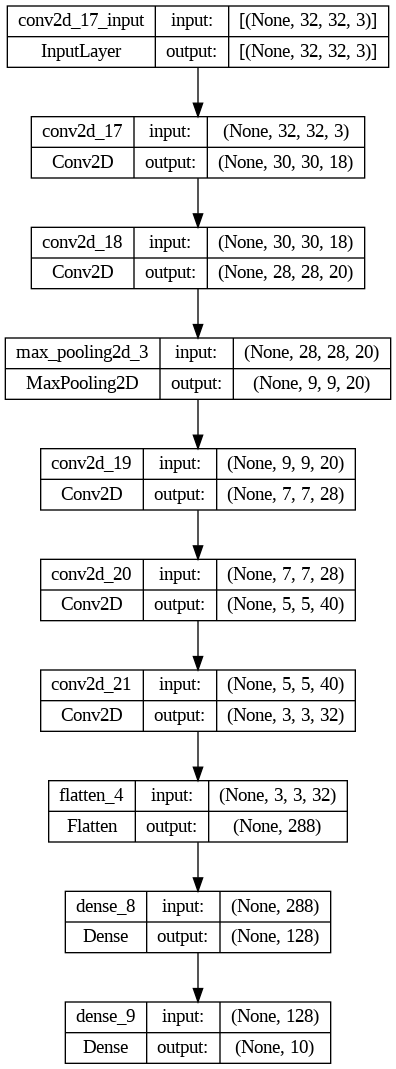

In [188]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

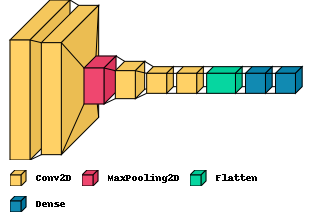

In [189]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [197]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [198]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**